In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [20]:
track = {}
folder = Path('OpalPatronage')
for file in folder.glob('*.txt'):
    try:
        df = pd.read_csv(file, sep='|')
        df = df[df['ti_region'] == 'All - NSW']
        df[['Tap_Ons','Tap_Offs']] = df[['Tap_Ons','Tap_Offs']].replace('<50',25)
        df[['Tap_Ons','Tap_Offs']] = df[['Tap_Ons','Tap_Offs']].replace('<100',50)
        df['tap_hour'] = df['tap_hour'].astype(int)
        df['Tap_Ons'] = df['Tap_Ons'].astype(int)
        df['Tap_Offs'] = df['Tap_Offs'].astype(int)
        date = df['trip_origin_date'].unique()[0]
        track[date] = df['Tap_Ons'].sum() + df['Tap_Offs'].sum()
    except Exception:
        print(file)
        
region_dict = {"Sydney CBD": [2000],
               "Parramatta": [2150],
               "Chatswood": [2067],
               "Macquarie": [2113, 2109],
              "North Sydney": [2060, 2061],
              "Strathfield": [2135],
              "Newcastle and surrounds": [2293, 2300],
              "Wollongong and surrounds": [2500]}

OpalPatronage\Opal_Patronage_20210603.txt
OpalPatronage\Opal_Patronage_20210604.txt
OpalPatronage\opal_patronage_filelist.txt


In [6]:
date_range = pd.date_range(start='2020-01-01', end='2025-07-15')
excluded_dates = ['2021-06-03', '2021-06-04']
formatted_dates = [d.strftime('%Y-%m-%d') for d in date_range if d.strftime('%Y-%m-%d') not in excluded_dates]

weekday_total = weekend_total = weekday_count = weekend_count = 0

for date_str in formatted_dates:
    date = pd.to_datetime(date_str)
    count = track.get(date_str, 0)
    if date.weekday() < 5:  # Monday–Friday
        weekday_total += count
        weekday_count += 1
    else:  # Saturday & Sunday
        weekend_total += count
        weekend_count += 1

AVG_WEEKDAY = weekday_total / weekday_count if weekday_count else 0
AVG_WEEKEND = weekend_total / weekend_count if weekend_count else 0

print(f"Average weekday patronage: {AVG_WEEKDAY:.2f}")
print(f"Average weekend patronage: {AVG_WEEKEND:.2f}")

Average weekday patronage: 3069506.79
Average weekend patronage: 1788298.92


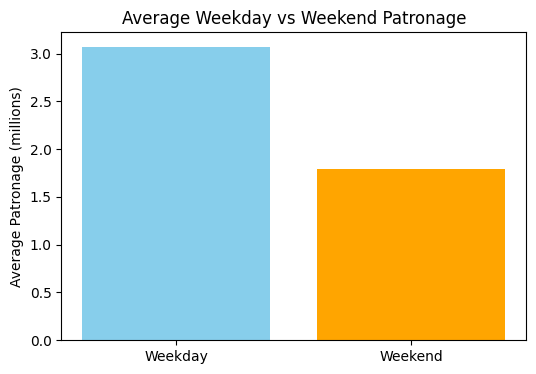

In [66]:
labels = ['Weekday', 'Weekend']
values = [AVG_WEEKDAY / 1e6, AVG_WEEKEND / 1e6]  # Convert to millions

plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=['skyblue', 'orange'])
plt.ylabel('Average Patronage (millions)')
plt.title('Average Weekday vs Weekend Patronage')
plt.show()

In [67]:
monthly_totals = {m: 0 for m in range(1, 13)}
monthly_counts = {m: 0 for m in range(1, 13)}

for i in formatted_dates:
    date = pd.to_datetime(i, format='%Y-%m-%d')
    month = date.month
    monthly_totals[month] += track[i]
    monthly_counts[month] += 1

for m in range(1, 13):
    avg = monthly_totals[m] / monthly_counts[m] if monthly_counts[m] else 0
    print(f"Average {pd.to_datetime(m, format='%m').strftime('%B')} patronage: {avg:.2f}")

Average January patronage: 2522851.88
Average February patronage: 3223113.97
Average March patronage: 3122264.78
Average April patronage: 2584528.89
Average May patronage: 2827859.68
Average June patronage: 2787950.70
Average July patronage: 2392704.56
Average August patronage: 2442462.10
Average September patronage: 2477639.00
Average October patronage: 2578812.26
Average November patronage: 2794394.67
Average December patronage: 2591608.55


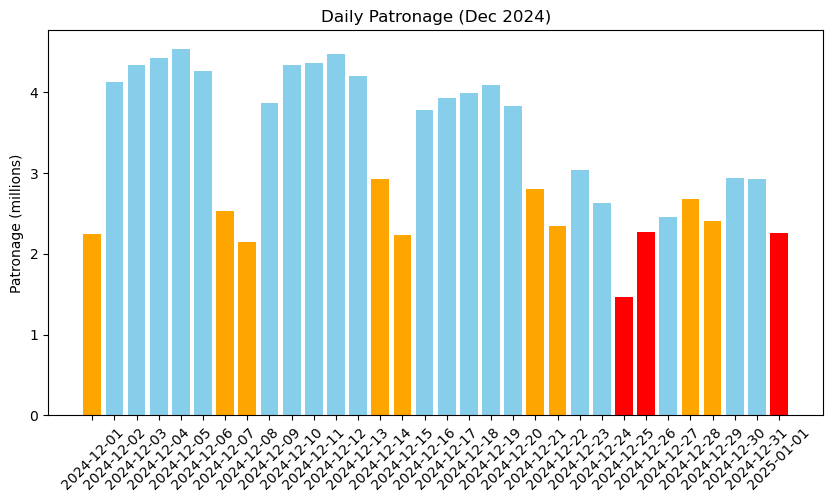

In [19]:
# Filter for only Dec 2024
dec2024_date_range = pd.date_range(start='2024-12-01', end='2025-01-01')
dec2024_formatted_dates = [d.strftime('%Y-%m-%d') for d in dec2024_date_range if d.strftime('%Y-%m-%d') not in excluded_dates]

dec2024_total_daily = []
dec2024_weekday = []
for date_str in dec2024_formatted_dates:
    dec2024_total_daily.append(track[date_str]/1e6)
    
    date = pd.to_datetime(date_str)
    if date.day == 25 or date.day == 26 or (date.month==1 and date.day==1):
        dec2024_weekday.append("Holiday")
    elif date.weekday() < 5:  # Monday–Friday
        dec2024_weekday.append("Weekday")
    else:  # Saturday & Sunday
        dec2024_weekday.append("Weekend")
        
color_map = {"Weekday": 'skyblue', "Weekend": 'orange', "Holiday": "red"}
colors = [color_map[weekday] for weekday in dec2024_weekday]
    
plt.figure(figsize=(10, 5))
plt.bar(dec2024_formatted_dates, dec2024_total_daily, color=colors)
plt.ylabel('Patronage (millions)')
plt.title('Daily Patronage (Dec 2024)')
plt.xticks(rotation=45)
plt.show()

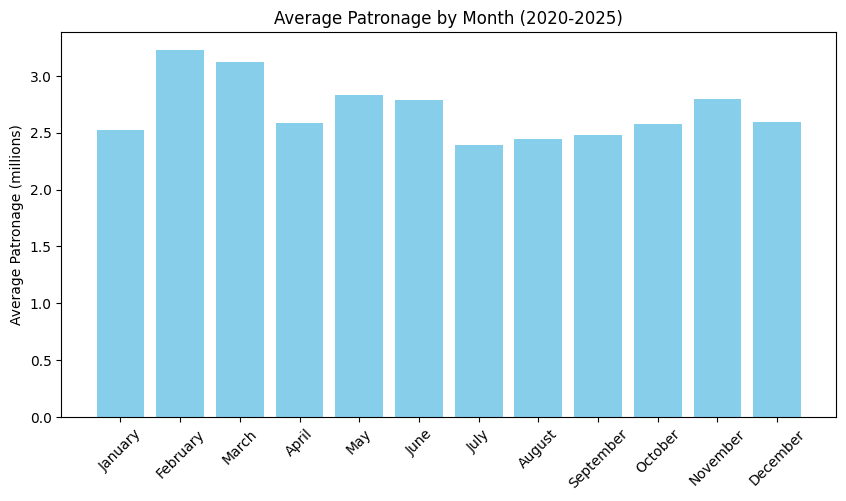

In [68]:
months = [pd.to_datetime(m, format='%m').strftime('%B') for m in range(1, 13)]
averages = [monthly_totals[m] / monthly_counts[m] / 1e6 for m in range(1, 13)]

plt.figure(figsize=(10, 5))
plt.bar(months, averages, color='skyblue')
plt.ylabel('Average Patronage (millions)')
plt.title('Average Patronage by Month (2020-2025)')
plt.xticks(rotation=45)
plt.show()

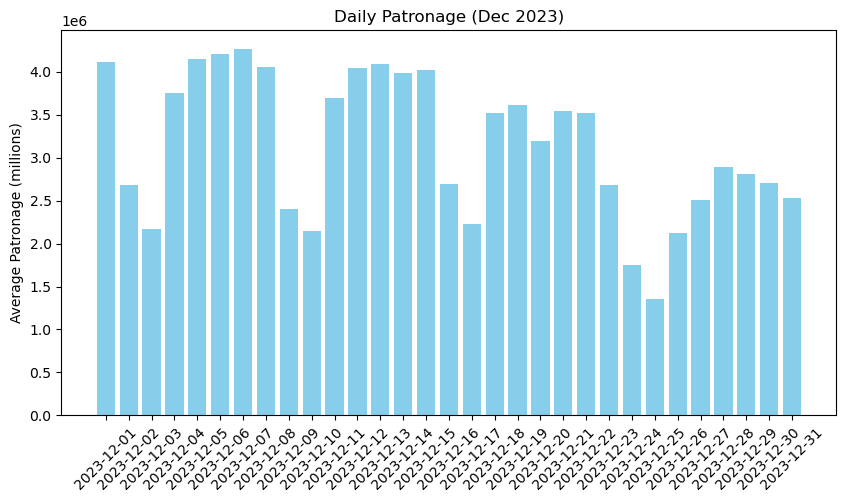

In [10]:
# Filter for only Dec 2023
dec2023_date_range = pd.date_range(start='2023-12-01', end='2023-12-31')
dec2023_formatted_dates = [d.strftime('%Y-%m-%d') for d in dec2023_date_range if d.strftime('%Y-%m-%d') not in excluded_dates]

dec2023_total_daily = []
for date_str in dec2023_formatted_dates:
    dec2023_total_daily.append(track[date_str]/1e6)
    
plt.figure(figsize=(10, 5))
plt.bar(dec2023_formatted_dates, dec2023_total_daily, color='skyblue')
plt.ylabel('Patronage (millions)')
plt.title('Daily Patronage (Dec 2023)')
plt.xticks(rotation=45)
plt.show()

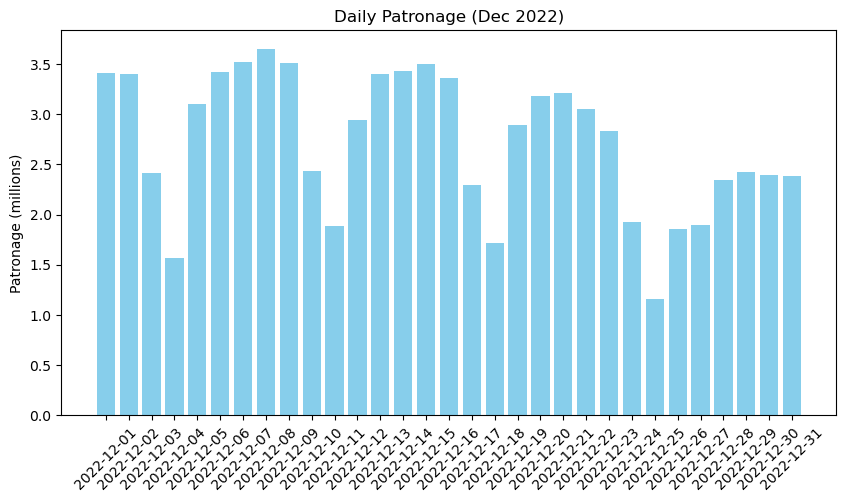

In [12]:
# Filter for only Dec 2022
dec2022_date_range = pd.date_range(start='2022-12-01', end='2022-12-31')
dec2022_formatted_dates = [d.strftime('%Y-%m-%d') for d in dec2022_date_range if d.strftime('%Y-%m-%d') not in excluded_dates]

dec2022_total_daily = []
for date_str in dec2022_formatted_dates:
    dec2022_total_daily.append(track[date_str]/1e6)
    
plt.figure(figsize=(10, 5))
plt.bar(dec2022_formatted_dates, dec2022_total_daily, color='skyblue')
plt.ylabel('Patronage (millions)')
plt.title('Daily Patronage (Dec 2022)')
plt.xticks(rotation=45)
plt.show()

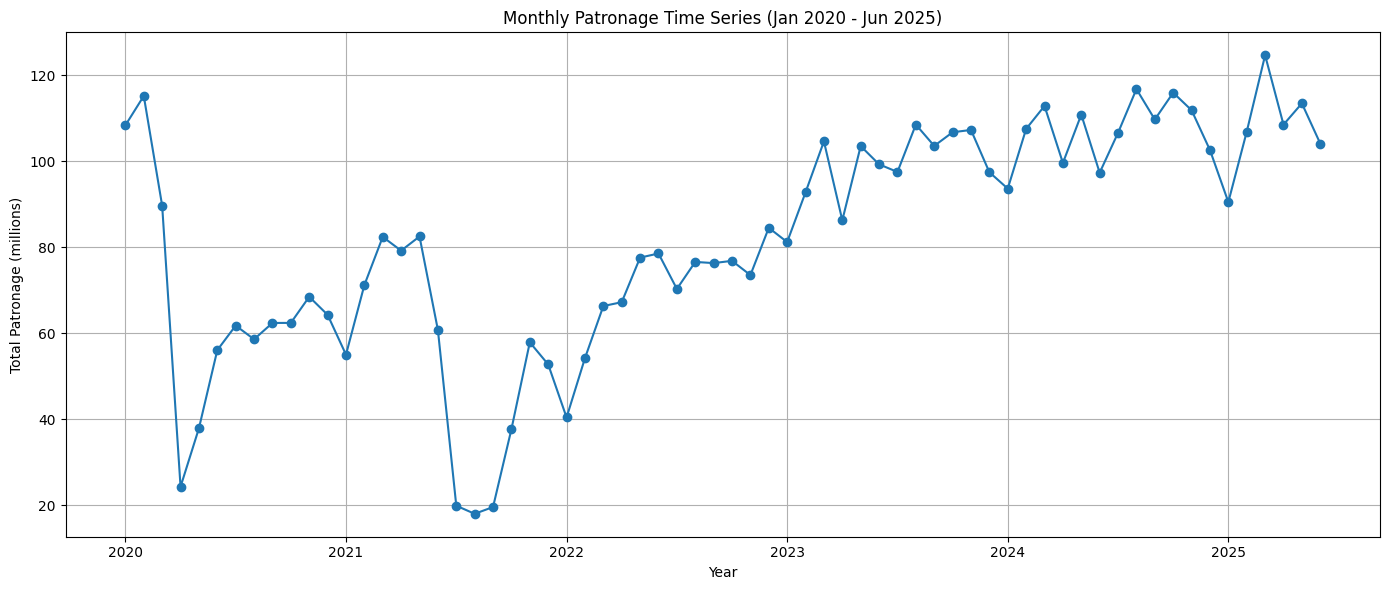

In [69]:
from collections import defaultdict

monthly_yearly_totals = defaultdict(int)

for i in formatted_dates:
    date = pd.to_datetime(i, format='%Y-%m-%d')
    key = f"{date.year}-{date.month:02d}"
    monthly_yearly_totals[key] += track[i]
del monthly_yearly_totals['2025-07']
keys = sorted(monthly_yearly_totals)
values = [monthly_yearly_totals[k] / 1e6 for k in keys]  # Convert to millions

plt.figure(figsize=(14, 6))
plt.plot(keys, values, marker='o', linestyle='-')

year_ticks = [k for k in keys if k.endswith('-01')]
plt.xticks(year_ticks, [k[:4] for k in year_ticks], rotation=0)

plt.xlabel('Year')
plt.ylabel('Total Patronage (millions)')
plt.title('Monthly Patronage Time Series (Jan 2020 - Jun 2025)')
plt.grid(True)
plt.tight_layout()
plt.show()
# ...existing code...


In [87]:
peak = 0
off = 0
PEAK = 0
OFF = 0
for file in folder.glob('*.txt'):
    if file.name == 'OpalPatronage_2021-06-03.txt' or file.name == 'OpalPatronage_2021-06-04.txt' or file.name == 'opal_patronage_filelist.txt':
        continue
    try:
        df = pd.read_csv(file, sep='|')
        df = df[df['ti_region'] == 'All - NSW']
        df[['Tap_Ons','Tap_Offs']] = df[['Tap_Ons','Tap_Offs']].replace('<50',25)
        df[['Tap_Ons','Tap_Offs']] = df[['Tap_Ons','Tap_Offs']].replace('<100',50)
        df['tap_hour'] = df['tap_hour'].astype(int)
        df['Tap_Ons'] = df['Tap_Ons'].astype(int)
        df['Tap_Offs'] = df['Tap_Offs'].astype(int)
        for _, row in df.iterrows():
            hour = row['tap_hour']
            ons = row['Tap_Ons']
            offs = row['Tap_Offs']
            if 6 <= hour < 9 or 15 <= hour < 18:
                peak += ons + offs
                PEAK += 1
            else:
                off += ons + offs
                OFF += 1
    except Exception:
        print(file)
print(f"Peak patronage: {peak/PEAK:.2f}")
print(f"Off-peak patronage: {off/OFF:.2f}")

Peak patronage: 45312.59
Off-peak patronage: 19454.88


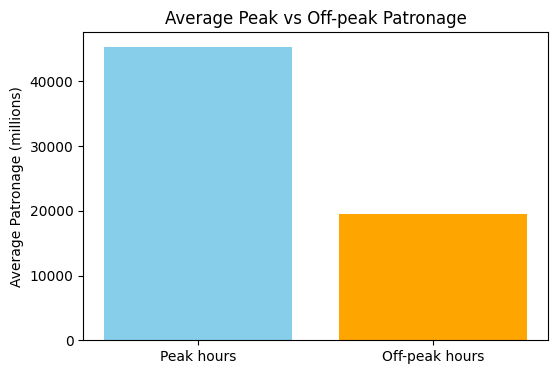

In [96]:
labels = ['Peak hours', 'Off-peak hours']
values = [(peak/PEAK), (off/OFF)]  # Convert to millions

plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=['skyblue', 'orange'])
plt.ylabel('Average Patronage (millions)')
plt.title('Average Peak vs Off-peak Patronage')
plt.show()

In [101]:
temp = pd.read_csv('OpalPatronage/Opal_Patronage_20250603.txt', sep='|')
regions = list(temp['ti_region'].unique())
regions.remove('All - NSW')
taps = {}
for i in regions:
    taps[i] = 0
count = {}
for i in regions:
    count[i] = 0

In [102]:
for file in folder.glob('*.txt'):
    if file.name == 'OpalPatronage_2021-06-03.txt' or file.name == 'OpalPatronage_2021-06-04.txt' or file.name == 'opal_patronage_filelist.txt':
        continue
    try:
        df = pd.read_csv(file, sep='|')
        df = df[df['ti_region'] != 'All - NSW']
        df[['Tap_Ons','Tap_Offs']] = df[['Tap_Ons','Tap_Offs']].replace('<50',25)
        df[['Tap_Ons','Tap_Offs']] = df[['Tap_Ons','Tap_Offs']].replace('<100',50)
        df['tap_hour'] = df['tap_hour'].astype(int)
        df['Tap_Ons'] = df['Tap_Ons'].astype(int)
        df['Tap_Offs'] = df['Tap_Offs'].astype(int)
        for _, row in df.iterrows():
            reg = row['ti_region']
            ons = row['Tap_Ons']
            offs = row['Tap_Offs']
            taps[reg] += ons + offs 
            count[reg] += 1
    except Exception:
        print(file)

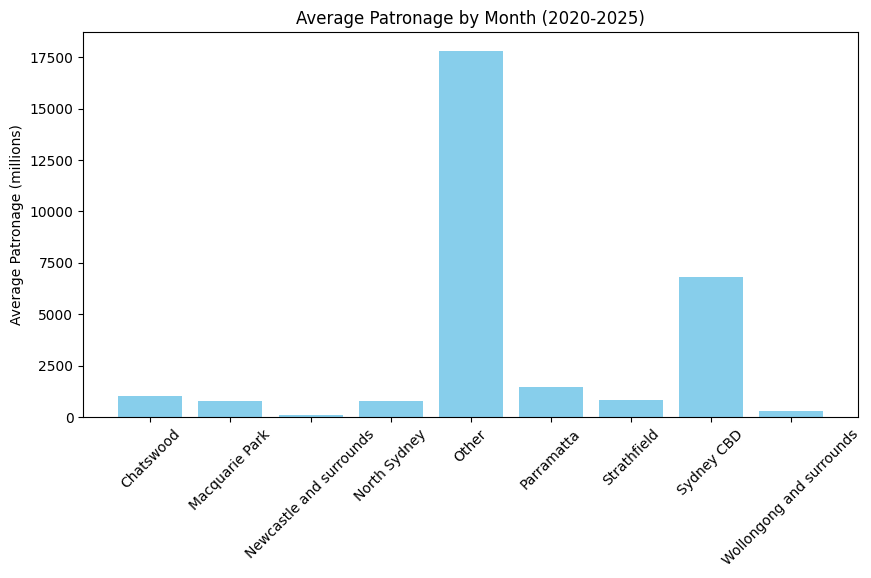

In [103]:
values = [taps[reg] / count[reg] for reg in regions] 
plt.figure(figsize=(10, 5))
plt.bar(regions, values, color='skyblue')
plt.ylabel('Average Patronage (millions)')
plt.title('Average Patronage by Month (2020-2025)')
plt.xticks(rotation=45)
plt.show()